# **EDA - Student’s performance**
Análise exploratória com aplicação de machine learning para classificação de performance estudantil

**Alunos**: Lucas Janot (22251259) E Raul Vieira (22251260)

## **Objetivo**: Explorar os dados, entender a base e prever o desempenho final dos alunos usando técnicas de ML.

## **Relevência**: O desempenho dos estudantes é um tópico importante na área da educação. Analisar os dados sobre o desempenho dos estudantes pode ajudar a entender melhor os fatores que influenciam o aprendizado e o sucesso acadêmico. Isso pode ser útil para educadores, pesquisadores, pais e formuladores de políticas educacionais.

#Importação de Bibliotecas

O primeiro passo foi importar algumas bibliotecas fundamentais para o trabalho.

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA

#Base de dados

A base consiste em dados sobre questões pessoais, familiares e hábitos educacionais;

Possui 145 linhas x 33 colunas.

##Dicionário


O objetivo do dicionário é entender o significado de cada valor dos registros dessa base.

### Class Labels

Student ID

1- Student Age (1: 18-21, 2: 22-25, 3: above 26)

2- Sex (1: female, 2: male)

3- Graduated high-school type: (1: private, 2: state, 3: other)

4- Scholarship type: (1: None, 2: 25%, 3: 50%, 4: 75%, 5: Full)

5- Additional work: (1: Yes, 2: No)

6- Regular artistic or sports activity: (1: Yes, 2: No)

7- Do you have a partner: (1: Yes, 2: No)

8- Total salary if available (1: USD 135-200, 2: USD 201-270, 3: USD 271-340, 4: USD 341-410, 5: above 410)

9- Transportation to the university: (1: Bus, 2: Private car/taxi, 3: bicycle, 4: Other)

10- Accommodation type in Cyprus: (1: rental, 2: dormitory, 3: with family, 4: Other)

11- Mother's education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)

12- Father's education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)

13- Number of sisters/brothers (if available): (1: 1, 2:, 2, 3: 3, 4: 4, 5: 5 or above)

14- Parental status: (1: married, 2: divorced, 3: died - one of them or both)

15- Mother's occupation: (1: retired, 2: housewife, 3: government officer, 4: private sector employee, 5: self-employment, 6: other)

16- Father's occupation: (1: retired, 2: government officer, 3: private sector employee, 4: self-employment, 5: other)

17- Weekly study hours: (1: None, 2: <5 hours, 3: 6-10 hours, 4: 11-20 hours, 5: more than 20 hours)

18- Reading frequency (non-scientific books/journals): (1: None, 2: Sometimes, 3: Often)

19- Reading frequency (scientific books/journals): (1: None, 2: Sometimes, 3: Often)

20- Attendance to the seminars/conferences related to the department: (1: Yes, 2: No)

21- Impact of your projects/activities on your success: (1: positive, 2: negative, 3: neutral)

22- Attendance to classes (1: always, 2: sometimes, 3: never)

23- Preparation to midterm exams 1: (1: alone, 2: with friends, 3: not applicable)

24- Preparation to midterm exams 2: (1: closest date to the exam, 2: regularly during the semester, 3: never)

25- Taking notes in classes: (1: never, 2: sometimes, 3: always)

26- Listening in classes: (1: never, 2: sometimes, 3: always)

27- Discussion improves my interest and success in the course: (1: never, 2: sometimes, 3: always)

28- Flip-classroom: (1: not useful, 2: useful, 3: not applicable)

29- Cumulative grade point average in the last semester (/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)

30- Expected Cumulative grade point average in the graduation (/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)

31- Course ID

32- Output Grade (0: Fail, 1: DD, 2: DC, 3: CC, 4: CB, 5: BB, 6: BA, 7: AA)

## Import

Nessa etapa é feita a importação da base para manipulação e início da análise.

In [33]:
df = pd.read_csv('https://raw.githubusercontent.com/raul-vieira/mineracao/main/DATA.csv')

In [34]:
df

,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


#Análise

Iniciou-se com transformações de valores numéricos para strings (com base no dicionário) e armazenamento dos conteúdos em diversas variáveis necessárias para a plotagem de gráficos.

##Transformação

In [35]:
# Create data transformations for all columns (1 to 30)
data1 = df['1'].apply(lambda x: '18-21' if x == 1 else ('22-25' if x == 2 else 'above 26'))
data2 = df['2'].apply(lambda x: 'Female' if x == 1 else 'Male')
data3 = df['3'].apply(lambda x: 'Private' if x == 1 else ('State' if x == 2 else 'Other'))
data4 = df['4'].apply(lambda x: 'None' if x == 1 else ('25%' if x == 2 else ('50%' if x == 3 else ('75%' if x == 4 else 'Full'))))
data5 = df['5'].apply(lambda x: 'Yes' if x == 1 else 'No')
data6 = df['6'].apply(lambda x: 'Yes' if x == 1 else 'No')
data7 = df['7'].apply(lambda x: 'Yes' if x == 1 else 'No')
data8 = df['8'].apply(lambda x: 'USD 135-200' if x == 1 else ('USD 201-270' if x == 2 else ('USD 271-340' if x == 3 else ('USD 341-410' if x == 4 else 'above 410'))))
data9 = df['9'].apply(lambda x: 'Bus' if x == 1 else ('Private car/taxi' if x == 2 else ('Bicycle' if x == 3 else 'Other')))
data10 = df['10'].apply(lambda x: 'Rental' if x == 1 else ('Dormitory' if x == 2 else ('With Family' if x == 3 else 'Other')))
data11 = df['11'].apply(lambda x: 'Primary School' if x == 1 else ('Secondary School' if x == 2 else ('High School' if x == 3 else ('University' if x == 4 else ('MSc.' if x == 5 else 'Ph.D.')))))
data12 = df['12'].apply(lambda x: 'Primary School' if x == 1 else ('Secondary School' if x == 2 else ('High School' if x == 3 else ('University' if x == 4 else ('MSc.' if x == 5 else 'Ph.D.')))))
data13 = df['13'].apply(lambda x: '1' if x == 1 else ('2' if x == 2 else ('3' if x == 3 else ('4' if x == 4 else '5 or above'))))
data14 = df['14'].apply(lambda x: 'Married' if x == 1 else ('Divorced' if x == 2 else 'Died - One of Them or Both'))
data15 = df['15'].apply(lambda x: 'Retired' if x == 1 else ('Housewife' if x == 2 else ('Government Officer' if x == 3 else ('Private Sector Employee' if x == 4 else ('Self-Employment' if x == 5 else 'Other')))))
data16 = df['16'].apply(lambda x: 'Retired' if x == 1 else ('Government Officer' if x == 2 else ('Private Sector Employee' if x == 3 else ('Self-Employment' if x == 4 else 'Other'))))
data17 = df['17'].apply(lambda x: 'None' if x == 1 else ('<5 hours' if x == 2 else ('6-10 hours' if x == 3 else ('11-20 hours' if x == 4 else 'More than 20 hours'))))
data18 = df['18'].apply(lambda x: 'None' if x == 1 else ('Sometimes' if x == 2 else 'Often'))
data19 = df['19'].apply(lambda x: 'None' if x == 1 else ('Sometimes' if x == 2 else 'Often'))
data20 = df['20'].apply(lambda x: 'Yes' if x == 1 else 'No')
data21 = df['21'].apply(lambda x: 'Positive' if x == 1 else ('Negative' if x == 2 else 'Neutral'))
data22 = df['22'].apply(lambda x: 'Always' if x == 1 else ('Sometimes' if x == 2 else 'Never'))
data23 = df['23'].apply(lambda x: 'Alone' if x == 1 else ('With Friends' if x == 2 else 'Not Applicable'))
data24 = df['24'].apply(lambda x: 'Closest Date to the Exam' if x == 1 else ('Regularly During the Semester' if x == 2 else 'Never'))
data25 = df['25'].apply(lambda x: 'Never' if x == 1 else ('Sometimes' if x == 2 else 'Always'))
data26 = df['26'].apply(lambda x: 'Never' if x == 1 else ('Sometimes' if x == 2 else 'Always'))
data27 = df['27'].apply(lambda x: 'Never' if x == 1 else ('Sometimes' if x == 2 else 'Always'))
data28 = df['28'].apply(lambda x: 'Not Useful' if x == 1 else ('Useful' if x == 2 else 'Not Applicable'))
data29 = df['29'].apply(lambda x: '<2.00' if x == 1 else ('2.00-2.49' if x == 2 else ('2.50-2.99' if x == 3 else ('3.00-3.49' if x == 4 else 'Above 3.49'))))
data30 = df['30'].apply(lambda x: '<2.00' if x == 1 else ('2.00-2.49' if x == 2 else ('2.50-2.99' if x == 3 else ('3.00-3.49' if x == 4 else 'Above 3.49'))))

contagem1 = data1.value_counts()
contagem2 = data2.value_counts()
contagem3 = data3.value_counts()
contagem4 = data4.value_counts()
contagem5 = data5.value_counts()
contagem6 = data6.value_counts()
contagem7 = data7.value_counts()
contagem8 = data8.value_counts()
contagem9 = data9.value_counts()
contagem10 = data10.value_counts()
contagem11 = data11.value_counts()
contagem12 = data12.value_counts()
contagem13 = data13.value_counts()
contagem14 = data14.value_counts()
contagem15 = data15.value_counts()
contagem16 = data16.value_counts()
contagem17 = data17.value_counts()
contagem18 = data18.value_counts()
contagem19 = data19.value_counts()
contagem20 = data20.value_counts()
contagem21 = data21.value_counts()
contagem22 = data22.value_counts()
contagem23 = data23.value_counts()
contagem24 = data24.value_counts()
contagem25 = data25.value_counts()
contagem26 = data26.value_counts()
contagem27 = data27.value_counts()
contagem28 = data28.value_counts()
contagem29 = data27.value_counts()
contagem30 = data30.value_counts()

total_counts1 = len(data1)
total_counts2 = len(data2)
total_counts3 = len(data3)
total_counts4 = len(data4)
total_counts5 = len(data5)
total_counts6 = len(data6)
total_counts7 = len(data7)
total_counts8 = len(data8)
total_counts9 = len(data9)
total_counts10 = len(data10)
total_counts11 = len(data11)
total_counts12 = len(data12)
total_counts13 = len(data13)
total_counts14 = len(data14)
total_counts15 = len(data15)
total_counts16 = len(data16)
total_counts17 = len(data17)
total_counts18 = len(data18)
total_counts19 = len(data19)
total_counts20 = len(data20)
total_counts21 = len(data21)
total_counts22 = len(data22)
total_counts23 = len(data23)
total_counts24 = len(data24)
total_counts25 = len(data25)
total_counts26 = len(data26)
total_counts27 = len(data27)
total_counts28 = len(data28)
total_counts29 = len(data29)
total_counts30 = len(data30)


Na parte a seguir, foram feitos barplots de todas as 30 variáveis, divididas em 4 grupos de gráficos para facilitar a visualização.

##Gráficos das Variáveis 1-9

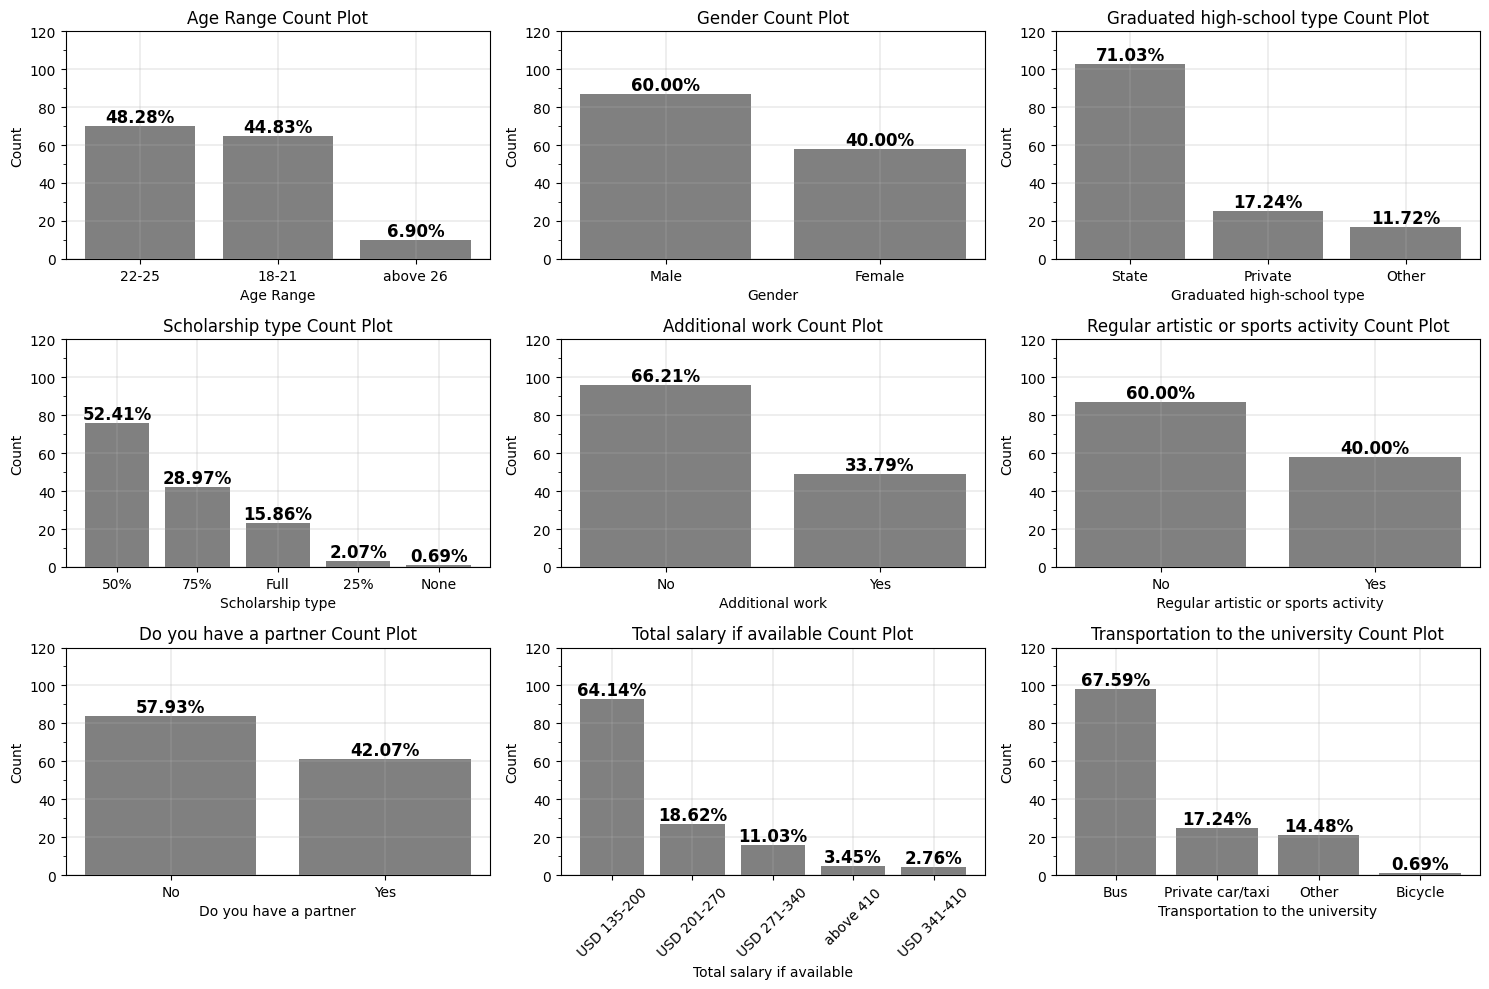

In [36]:
# Create the figure and subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 10))

# bar plot
axs[0,1].bar(contagem2.index, contagem2.values,color='grey')

# Add labels and title
axs[0,1].set_xlabel('Gender')
axs[0,1].set_ylabel('Count')
axs[0,1].set_title('Gender Count Plot')
axs[0,1].grid(linewidth=0.3)
axs[0,1].set_ylim(top=120)
axs[0,1].yaxis.set_minor_locator(plt.MultipleLocator(10))
for p in axs[0,1].patches:
    height = p.get_height()
    pct = height / total_counts2 * 100
    axs[0,1].annotate(f'{pct:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom',
                    fontsize=12, color='black', fontweight='bold', rotation=0)


# bar plot
axs[0,0].bar(contagem1.index, contagem1.values,color='grey')

# Add labels and title for age plot
axs[0,0].set_xlabel('Age Range')
axs[0,0].set_ylabel('Count')
axs[0,0].set_title('Age Range Count Plot')
axs[0,0].grid(linewidth=0.3)
axs[0,0].set_ylim(top=120)
axs[0,0].yaxis.set_minor_locator(plt.MultipleLocator(10))
for p in axs[0,0].patches:
    height = p.get_height()
    pct = height / total_counts1 * 100
    axs[0,0].annotate(f'{pct:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom',
                    fontsize=12, color='black', fontweight='bold', rotation=0)


# bar plot
axs[0,2].bar(contagem3.index, contagem3.values,color='grey')

# Add labels and title
axs[0,2].set_xlabel('Graduated high-school type')
axs[0,2].set_ylabel('Count')
axs[0,2].set_title('Graduated high-school type Count Plot')
axs[0,2].grid(linewidth=0.3)
axs[0,2].set_ylim(top=120)
axs[0,2].yaxis.set_minor_locator(plt.MultipleLocator(10))
for p in axs[0,2].patches:
    height = p.get_height()
    pct = height / total_counts1 * 100
    axs[0,2].annotate(f'{pct:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom',
                    fontsize=12, color='black', fontweight='bold', rotation=0)



# bar plot
axs[1,0].bar(contagem4.index, contagem4.values,color='grey')

# Add labels and title
axs[1,0].set_xlabel('Scholarship type')
axs[1,0].set_ylabel('Count')
axs[1,0].set_title('Scholarship type Count Plot')
axs[1,0].set_ylim(top=120)
axs[1,0].grid(linewidth=0.3)
axs[1,0].yaxis.set_minor_locator(plt.MultipleLocator(10))
for p in axs[1,0].patches:
    height = p.get_height()
    pct = height / total_counts1 * 100
    axs[1,0].annotate(f'{pct:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom',
                    fontsize=12, color='black', fontweight='bold', rotation=0)

# bar plot
axs[1,1].bar(contagem5.index, contagem5.values,color='grey')

# Add labels and title
axs[1,1].set_xlabel('Additional work')
axs[1,1].set_ylabel('Count')
axs[1,1].set_title('Additional work Count Plot')
axs[1,1].grid(linewidth=0.3)
axs[1,1].set_ylim(top=120)
axs[1,1].yaxis.set_minor_locator(plt.MultipleLocator(10))
for p in axs[1,1].patches:
    height = p.get_height()
    pct = height / total_counts1 * 100
    axs[1,1].annotate(f'{pct:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom',
                    fontsize=12, color='black', fontweight='bold', rotation=0)

# bar plot
axs[1,2].bar(contagem6.index, contagem6.values,color='grey')

# Add labels and title
axs[1,2].set_xlabel(' Regular artistic or sports activity')
axs[1,2].set_ylabel('Count')
axs[1,2].set_title('Regular artistic or sports activity Count Plot')
axs[1,2].grid(linewidth=0.3)
axs[1,2].set_ylim(top=120)
axs[1,2].yaxis.set_minor_locator(plt.MultipleLocator(10))
for p in axs[1,2].patches:
    height = p.get_height()
    pct = height / total_counts1 * 100
    axs[1,2].annotate(f'{pct:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom',
                    fontsize=12, color='black', fontweight='bold', rotation=0)

# bar plot
axs[2,0].bar(contagem7.index, contagem7.values,color='grey')

# Add labels and title
axs[2,0].set_xlabel('Do you have a partner')
axs[2,0].set_ylabel('Count')
axs[2,0].set_title('Do you have a partner Count Plot')
axs[2,0].grid(linewidth=0.3)
axs[2,0].set_ylim(top=120)
axs[2,0].yaxis.set_minor_locator(plt.MultipleLocator(10))
for p in axs[2,0].patches:
    height = p.get_height()
    pct = height / total_counts1 * 100
    axs[2,0].annotate(f'{pct:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom',
                    fontsize=12, color='black', fontweight='bold', rotation=0)

# bar plot
axs[2,1].bar(contagem8.index, contagem8.values,color='grey')

# Add labels and title
axs[2,1].set_xlabel('Total salary if available')
axs[2,1].set_ylabel('Count')
axs[2,1].set_title('Total salary if available Count Plot')
axs[2,1].grid(linewidth=0.3)
axs[2,1].set_ylim(top=120)
axs[2,1].tick_params(axis='x', rotation=45)
axs[2,1].yaxis.set_minor_locator(plt.MultipleLocator(10))

for p in axs[2,1].patches:
    height = p.get_height()
    pct = height / total_counts1 * 100
    axs[2,1].annotate(f'{pct:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom',
                    fontsize=12, color='black', fontweight='bold', rotation=0)

# bar plot
axs[2,2].bar(contagem9.index, contagem9.values,color='grey')

# Add labels and title
axs[2,2].set_xlabel('Transportation to the university')
axs[2,2].set_ylabel('Count')
axs[2,2].set_title('Transportation to the university Count Plot')
axs[2,2].grid(linewidth=0.3)
axs[2,2].set_ylim(top=120)
axs[2,2].yaxis.set_minor_locator(plt.MultipleLocator(10))
for p in axs[2,2].patches:
    height = p.get_height()
    pct = height / total_counts1 * 100
    axs[2,2].annotate(f'{pct:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom',
                    fontsize=12, color='black', fontweight='bold', rotation=0)



# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


##Gráficos das Variáveis 10-18

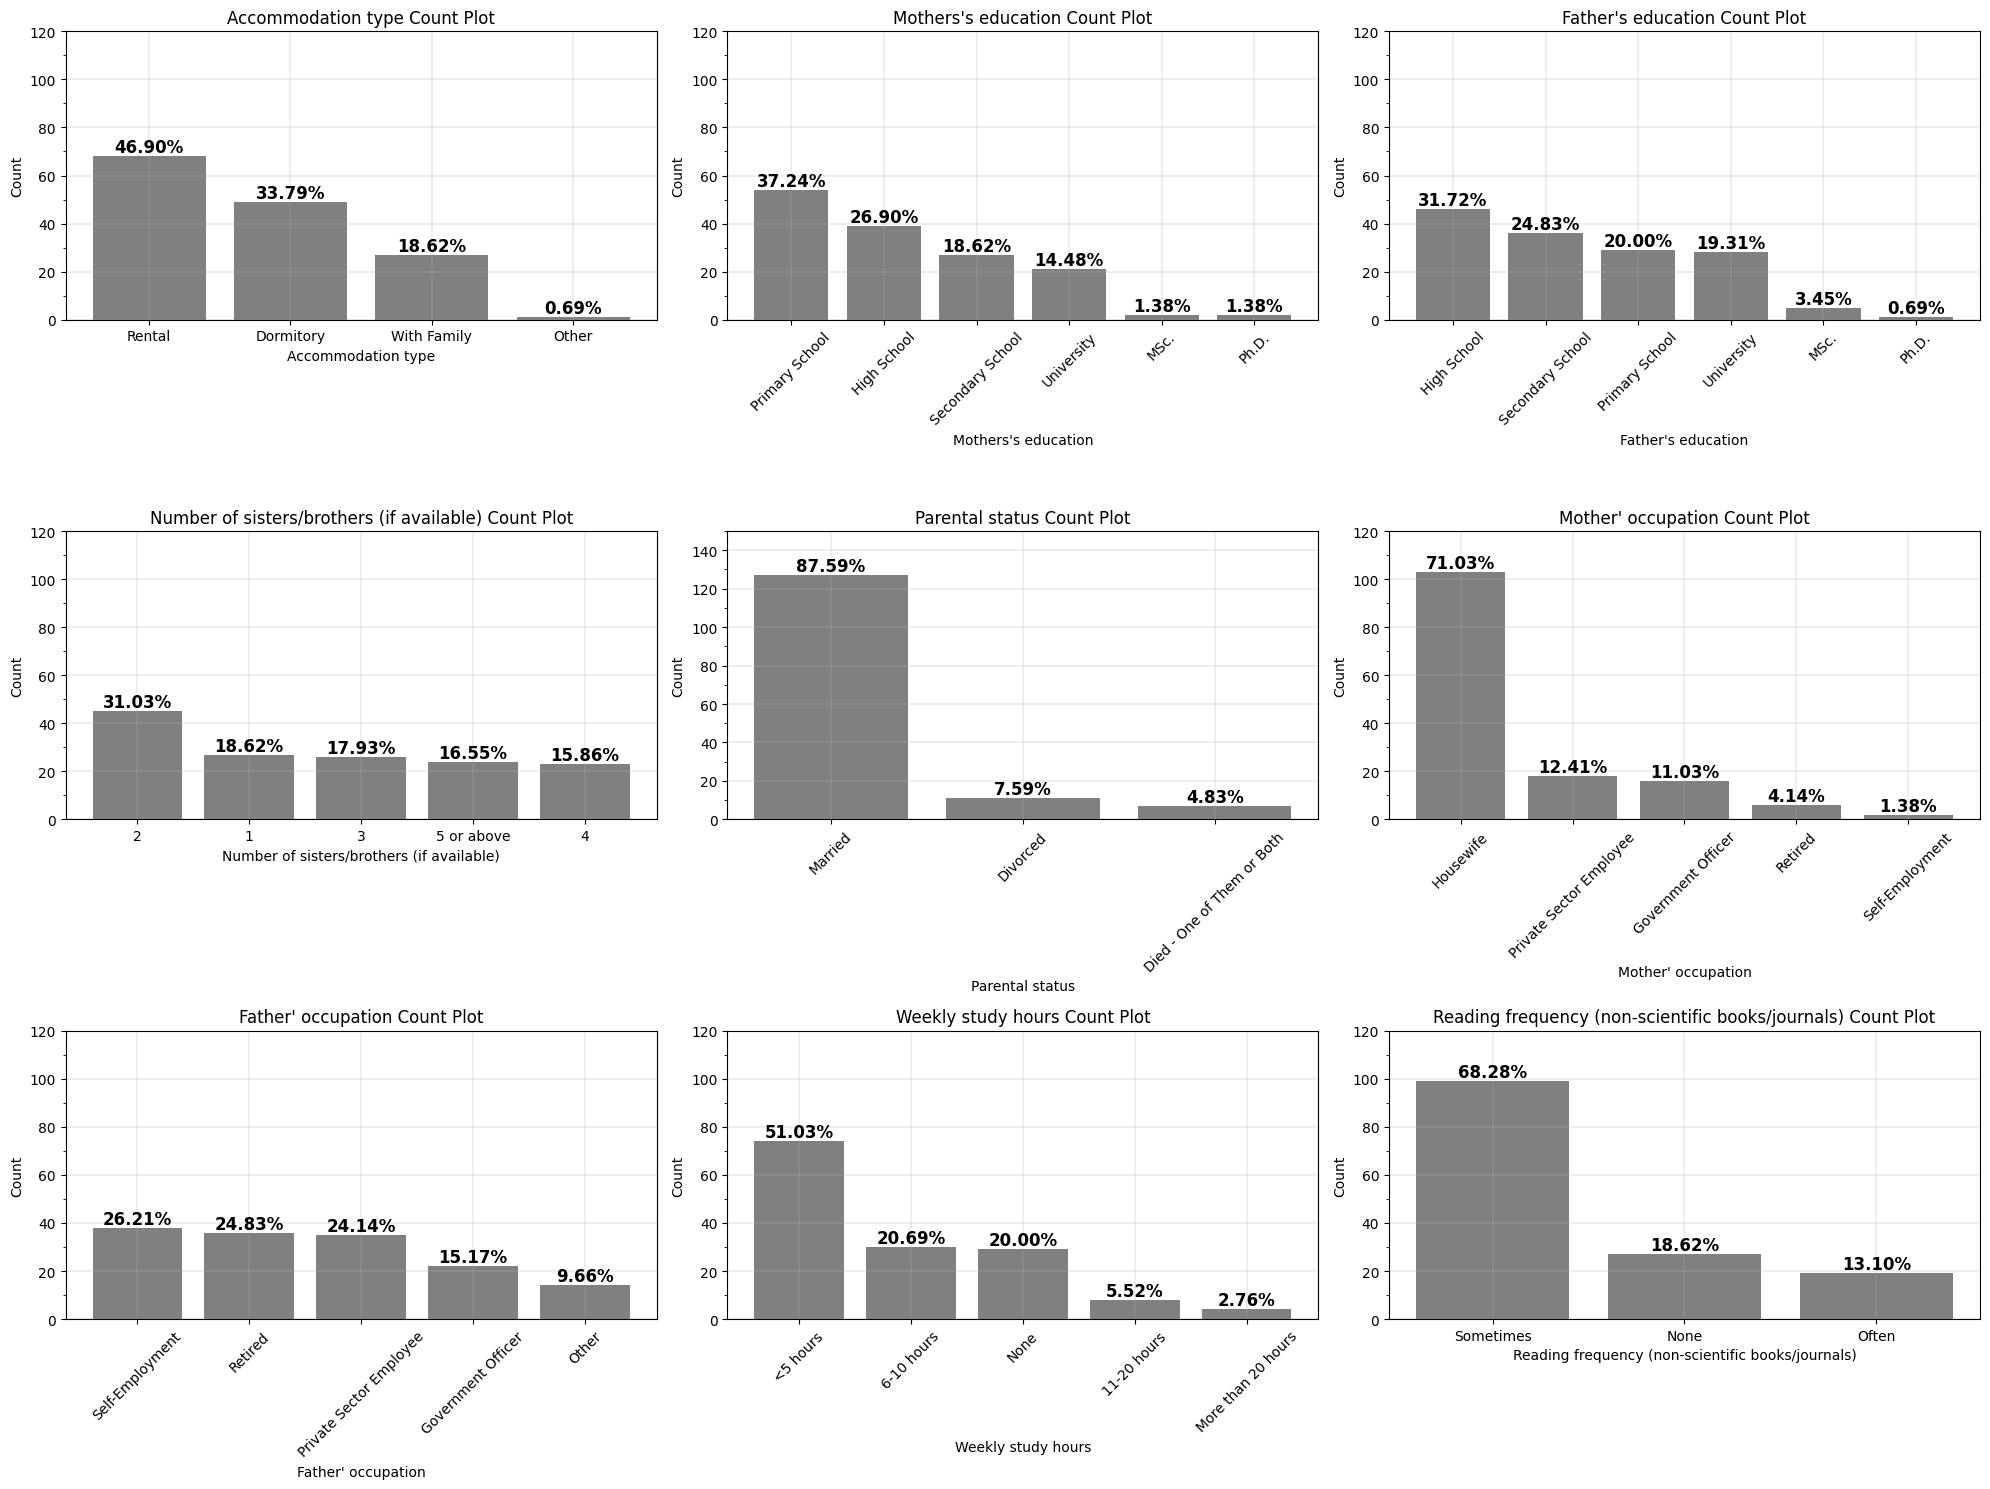

In [37]:
# Create the figure and subplots
fig, axs = plt.subplots(3, 3, figsize=(20,15))



# bar plot
axs[0,0].bar(contagem10.index, contagem10.values,color='grey')

# Add labels and title
axs[0,0].set_xlabel('Accommodation type')
axs[0,0].set_ylabel('Count')
axs[0,0].set_title('Accommodation type Count Plot')
axs[0,0].grid(linewidth=0.3)
axs[0,0].set_ylim(top=120)
axs[0,0].yaxis.set_minor_locator(plt.MultipleLocator(10))
for p in axs[0,0].patches:
    height = p.get_height()
    pct = height / total_counts1 * 100
    axs[0,0].annotate(f'{pct:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom',
                    fontsize=12, color='black', fontweight='bold', rotation=0)

# bar plot
axs[0,1].bar(contagem11.index, contagem11.values,color='grey')

# Add labels and title for gender plot
axs[0,1].set_xlabel('Mothers\'s education')
axs[0,1].set_ylabel('Count')
axs[0,1].set_title('Mothers\'s education Count Plot')
axs[0,1].grid(linewidth=0.3)
axs[0,1].set_ylim(top=120)
axs[0,1].tick_params(axis='x', rotation=45)
axs[0,1].yaxis.set_minor_locator(plt.MultipleLocator(10))
for p in axs[0,1].patches:
    height = p.get_height()
    pct = height / total_counts2 * 100
    axs[0,1].annotate(f'{pct:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom',
                    fontsize=12, color='black', fontweight='bold', rotation=0)





# bar plot
axs[0,2].bar(contagem12.index, contagem12.values,color='grey')

# Add labels and title
axs[0,2].set_xlabel('Father\'s education')
axs[0,2].set_ylabel('Count')
axs[0,2].set_title('Father\'s education Count Plot')
axs[0,2].grid(linewidth=0.3)
axs[0,2].set_ylim(top=120)
axs[0,2].tick_params(axis='x', rotation=45)
axs[0,2].yaxis.set_minor_locator(plt.MultipleLocator(10))
for p in axs[0,2].patches:
    height = p.get_height()
    pct = height / total_counts1 * 100
    axs[0,2].annotate(f'{pct:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom',
                    fontsize=12, color='black', fontweight='bold', rotation=0)



# bar plot
axs[1,0].bar(contagem13.index, contagem13.values,color='grey')

# Add labels and title
axs[1,0].set_xlabel('Number of sisters/brothers (if available)')
axs[1,0].set_ylabel('Count')
axs[1,0].set_title('Number of sisters/brothers (if available) Count Plot')
axs[1,0].set_ylim(top=120)
axs[1,0].grid(linewidth=0.3)
axs[1,0].yaxis.set_minor_locator(plt.MultipleLocator(10))
for p in axs[1,0].patches:
    height = p.get_height()
    pct = height / total_counts1 * 100
    axs[1,0].annotate(f'{pct:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom',
                    fontsize=12, color='black', fontweight='bold', rotation=0)

# bar plot
axs[1,1].bar(contagem14.index, contagem14.values,color='grey')

# Add labels and title
axs[1,1].set_xlabel('Parental status')
axs[1,1].set_ylabel('Count')
axs[1,1].set_title('Parental status Count Plot')
axs[1,1].grid(linewidth=0.3)
axs[1,1].set_ylim(top=150)
axs[1,1].tick_params(axis='x', rotation=45)
axs[1,1].yaxis.set_minor_locator(plt.MultipleLocator(10))
for p in axs[1,1].patches:
    height = p.get_height()
    pct = height / total_counts1 * 100
    axs[1,1].annotate(f'{pct:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom',
                    fontsize=12, color='black', fontweight='bold', rotation=0)

# bar plot
axs[1,2].bar(contagem15.index, contagem15.values,color='grey')

# Add labels and title
axs[1,2].set_xlabel('Mother\' occupation')
axs[1,2].set_ylabel('Count')
axs[1,2].set_title('Mother\' occupation Count Plot')
axs[1,2].grid(linewidth=0.3)
axs[1,2].set_ylim(top=120)
axs[1,2].tick_params(axis='x', rotation=45)
axs[1,2].yaxis.set_minor_locator(plt.MultipleLocator(10))
for p in axs[1,2].patches:
    height = p.get_height()
    pct = height / total_counts1 * 100
    axs[1,2].annotate(f'{pct:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom',
                    fontsize=12, color='black', fontweight='bold', rotation=0)

# bar plot
axs[2,0].bar(contagem16.index, contagem16.values,color='grey')

# Add labels and title
axs[2,0].set_xlabel('Father\' occupation')
axs[2,0].set_ylabel('Count')
axs[2,0].set_title('Father\' occupation Count Plot')
axs[2,0].grid(linewidth=0.3)
axs[2,0].set_ylim(top=120)
axs[2,0].tick_params(axis='x', rotation=45)
axs[2,0].yaxis.set_minor_locator(plt.MultipleLocator(10))
for p in axs[2,0].patches:
    height = p.get_height()
    pct = height / total_counts1 * 100
    axs[2,0].annotate(f'{pct:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom',
                    fontsize=12, color='black', fontweight='bold', rotation=0)

# bar plot
axs[2,1].bar(contagem17.index, contagem17.values,color='grey')

# Add labels and title
axs[2,1].set_xlabel('Weekly study hours')
axs[2,1].set_ylabel('Count')
axs[2,1].set_title('Weekly study hours Count Plot')
axs[2,1].grid(linewidth=0.3)
axs[2,1].set_ylim(top=120)
axs[2,1].tick_params(axis='x', rotation=45)
axs[2,1].yaxis.set_minor_locator(plt.MultipleLocator(10))

for p in axs[2,1].patches:
    height = p.get_height()
    pct = height / total_counts1 * 100
    axs[2,1].annotate(f'{pct:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom',
                    fontsize=12, color='black', fontweight='bold', rotation=0)

# bar plot
axs[2,2].bar(contagem18.index, contagem18.values,color='grey')

# Add labels and title
axs[2,2].set_xlabel('Reading frequency (non-scientific books/journals)')
axs[2,2].set_ylabel('Count')
axs[2,2].set_title('Reading frequency (non-scientific books/journals) Count Plot')
axs[2,2].grid(linewidth=0.3)
axs[2,2].set_ylim(top=120)
axs[2,2].yaxis.set_minor_locator(plt.MultipleLocator(10))

for p in axs[2,2].patches:
    height = p.get_height()
    pct = height / total_counts1 * 100
    axs[2,2].annotate(f'{pct:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom',
                    fontsize=12, color='black', fontweight='bold', rotation=0)



# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


##Gráficos das Variáveis 19-27

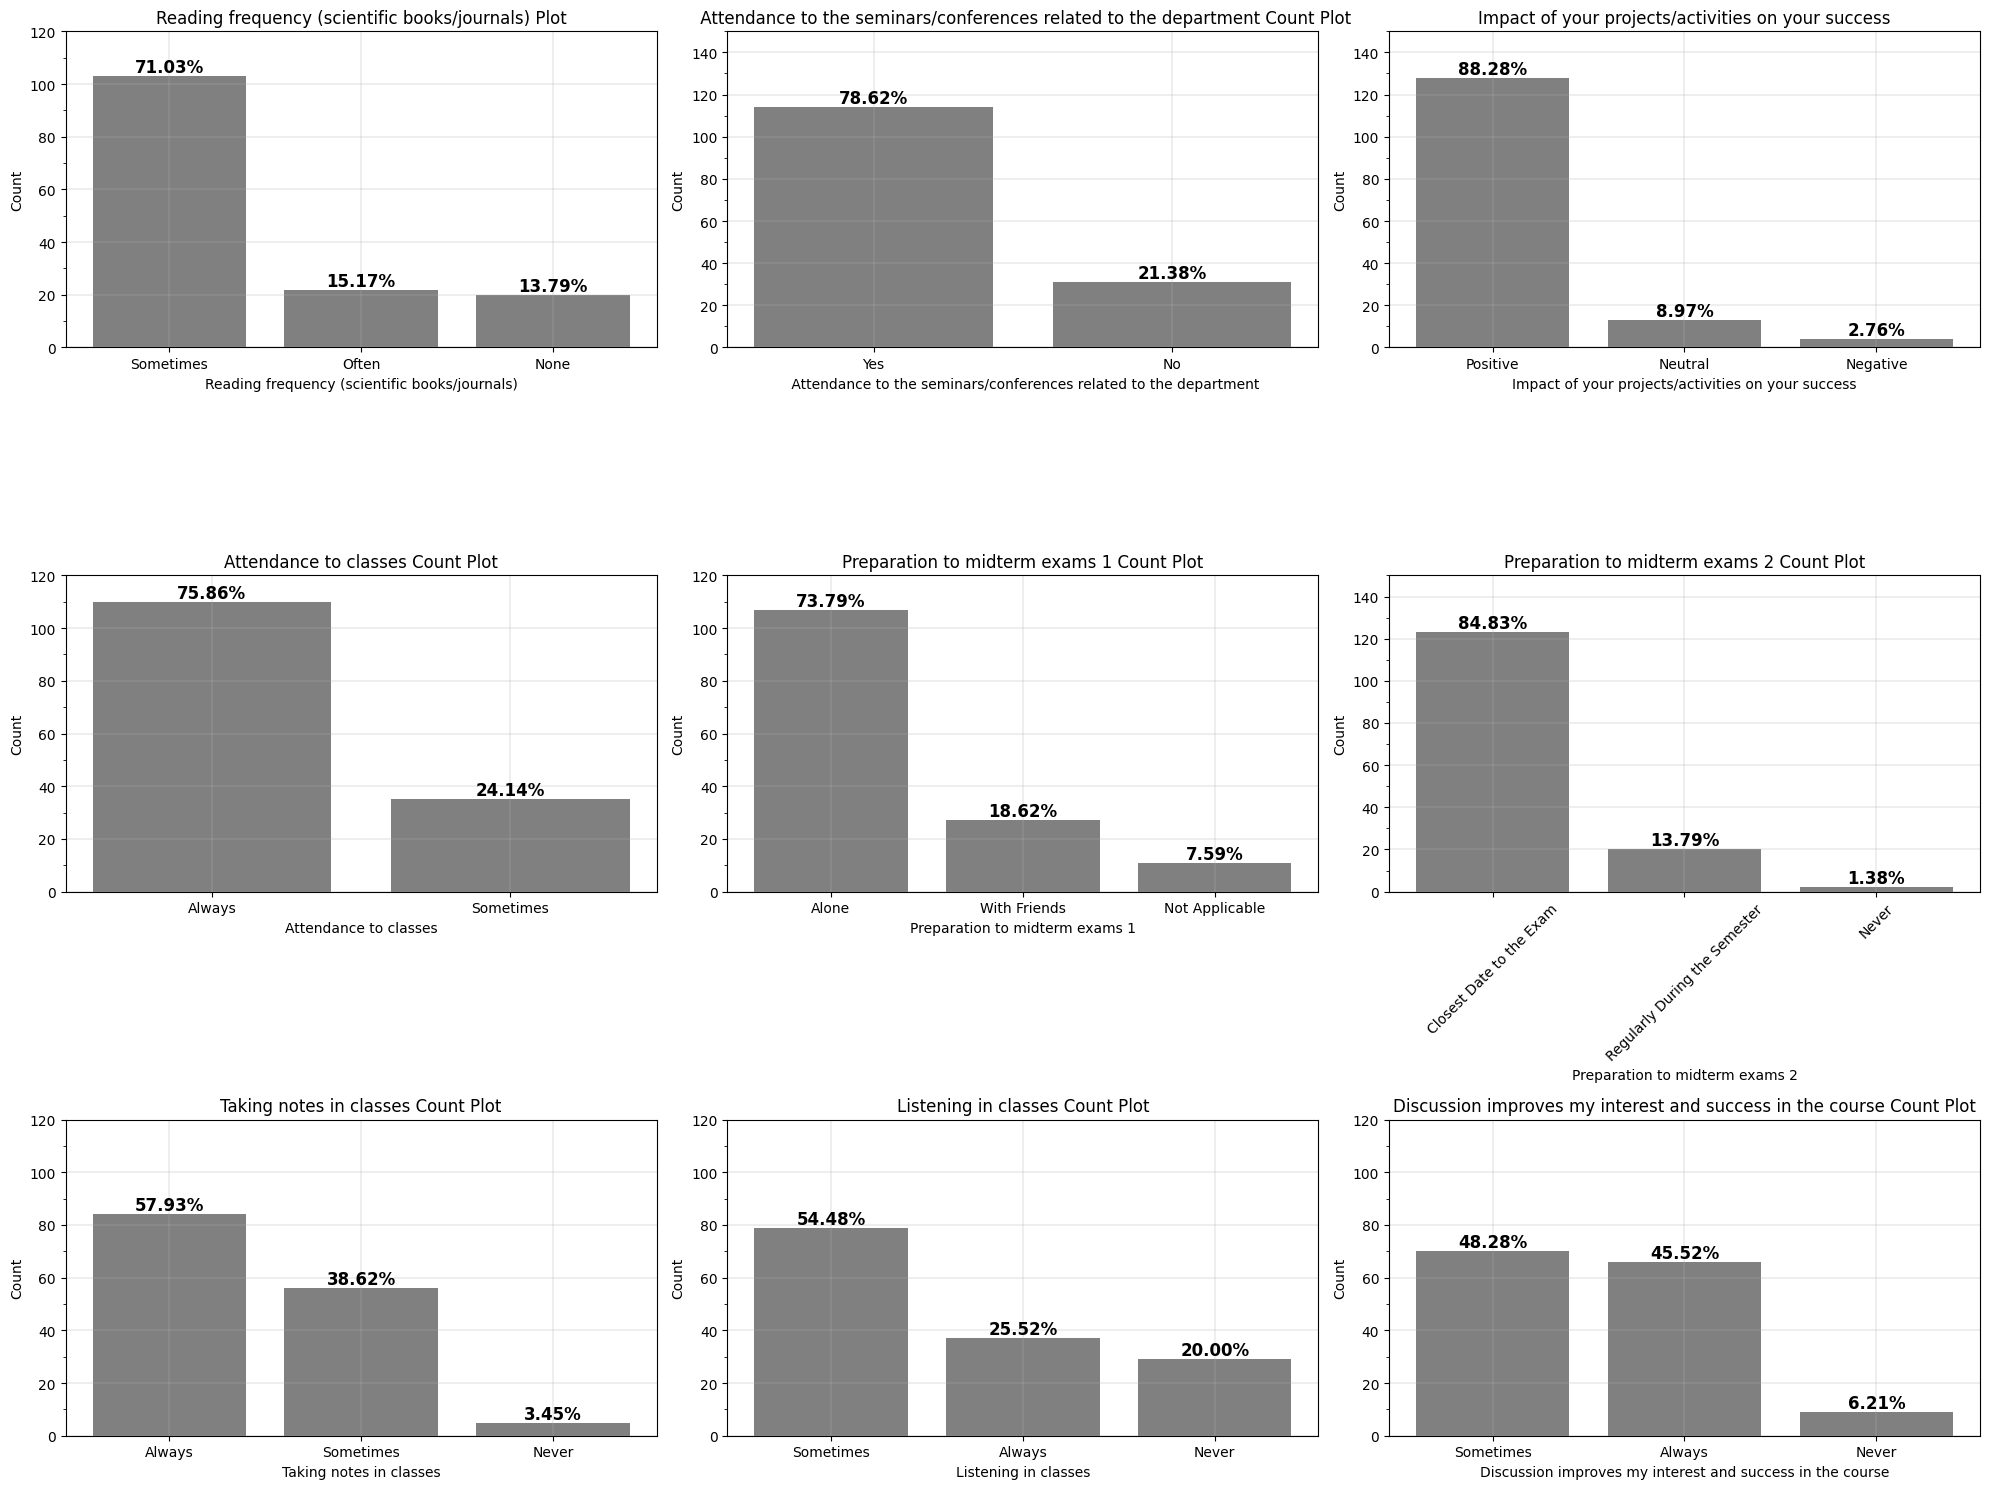

In [38]:
# Create the figure and subplots
fig, axs = plt.subplots(3, 3, figsize=(20, 15))



# bar plot
axs[0,0].bar(contagem19.index, contagem19.values,color='grey')

# Add labels and title
axs[0,0].set_xlabel('Reading frequency (scientific books/journals)')
axs[0,0].set_ylabel('Count')
axs[0,0].set_title('Reading frequency (scientific books/journals) Plot')
axs[0,0].grid(linewidth=0.3)
axs[0,0].set_ylim(top=120)
axs[0,0].yaxis.set_minor_locator(plt.MultipleLocator(10))
for p in axs[0,0].patches:
    height = p.get_height()
    pct = height / total_counts1 * 100
    axs[0,0].annotate(f'{pct:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom',
                    fontsize=12, color='black', fontweight='bold', rotation=0)

# bar plot
axs[0,1].bar(contagem20.index, contagem20.values,color='grey')

# Add labels and title for gender plot
axs[0,1].set_xlabel(' Attendance to the seminars/conferences related to the department')
axs[0,1].set_ylabel('Count')
axs[0,1].set_title(' Attendance to the seminars/conferences related to the department Count Plot')
axs[0,1].grid(linewidth=0.3)
axs[0,1].set_ylim(top=150)
axs[0,1].yaxis.set_minor_locator(plt.MultipleLocator(10))
for p in axs[0,1].patches:
    height = p.get_height()
    pct = height / total_counts2 * 100
    axs[0,1].annotate(f'{pct:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom',
                    fontsize=12, color='black', fontweight='bold', rotation=0)





# bar plot
axs[0,2].bar(contagem21.index, contagem21.values,color='grey')

# Add labels and title
axs[0,2].set_xlabel('Impact of your projects/activities on your success')
axs[0,2].set_ylabel('Count')
axs[0,2].set_title('Impact of your projects/activities on your success')
axs[0,2].grid(linewidth=0.3)
axs[0,2].set_ylim(top=150)
axs[0,2].yaxis.set_minor_locator(plt.MultipleLocator(10))
for p in axs[0,2].patches:
    height = p.get_height()
    pct = height / total_counts1 * 100
    axs[0,2].annotate(f'{pct:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom',
                    fontsize=12, color='black', fontweight='bold', rotation=0)



# bar plot
axs[1,0].bar(contagem22.index, contagem22.values,color='grey')

# Add labels and title
axs[1,0].set_xlabel('Attendance to classes')
axs[1,0].set_ylabel('Count')
axs[1,0].set_title('Attendance to classes Count Plot')
axs[1,0].set_ylim(top=120)
axs[1,0].grid(linewidth=0.3)
axs[1,0].yaxis.set_minor_locator(plt.MultipleLocator(10))
for p in axs[1,0].patches:
    height = p.get_height()
    pct = height / total_counts1 * 100
    axs[1,0].annotate(f'{pct:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom',
                    fontsize=12, color='black', fontweight='bold', rotation=0)

# bar plot
axs[1,1].bar(contagem23.index, contagem23.values,color='grey')

# Add labels and title
axs[1,1].set_xlabel('Preparation to midterm exams 1')
axs[1,1].set_ylabel('Count')
axs[1,1].set_title('Preparation to midterm exams 1 Count Plot')
axs[1,1].grid(linewidth=0.3)
axs[1,1].set_ylim(top=120)
axs[1,1].yaxis.set_minor_locator(plt.MultipleLocator(10))
for p in axs[1,1].patches:
    height = p.get_height()
    pct = height / total_counts1 * 100
    axs[1,1].annotate(f'{pct:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom',
                    fontsize=12, color='black', fontweight='bold', rotation=0)

# bar plot
axs[1,2].bar(contagem24.index, contagem24.values,color='grey')

# Add labels and title
axs[1,2].set_xlabel('Preparation to midterm exams 2')
axs[1,2].set_ylabel('Count')
axs[1,2].set_title('Preparation to midterm exams 2 Count Plot')
axs[1,2].grid(linewidth=0.3)
axs[1,2].set_ylim(top=150)
axs[1,2].tick_params(axis='x', rotation=45)
axs[1,2].yaxis.set_minor_locator(plt.MultipleLocator(10))
for p in axs[1,2].patches:
    height = p.get_height()
    pct = height / total_counts1 * 100
    axs[1,2].annotate(f'{pct:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom',
                    fontsize=12, color='black', fontweight='bold', rotation=0)

# bar plot
axs[2,0].bar(contagem25.index, contagem25.values,color='grey')

# Add labels and title
axs[2,0].set_xlabel('Taking notes in classes')
axs[2,0].set_ylabel('Count')
axs[2,0].set_title('Taking notes in classes Count Plot')
axs[2,0].grid(linewidth=0.3)
axs[2,0].set_ylim(top=120)
axs[2,0].yaxis.set_minor_locator(plt.MultipleLocator(10))
for p in axs[2,0].patches:
    height = p.get_height()
    pct = height / total_counts1 * 100
    axs[2,0].annotate(f'{pct:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom',
                    fontsize=12, color='black', fontweight='bold', rotation=0)

# bar plot
axs[2,1].bar(contagem26.index, contagem26.values,color='grey')

# Add labels and title
axs[2,1].set_xlabel('Listening in classes')
axs[2,1].set_ylabel('Count')
axs[2,1].set_title('Listening in classes Count Plot')
axs[2,1].grid(linewidth=0.3)
axs[2,1].set_ylim(top=120)
axs[2,1].yaxis.set_minor_locator(plt.MultipleLocator(10))
for p in axs[2,1].patches:
    height = p.get_height()
    pct = height / total_counts1 * 100
    axs[2,1].annotate(f'{pct:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom',
                    fontsize=12, color='black', fontweight='bold', rotation=0)

# bar plot
axs[2,2].bar(contagem27.index, contagem27.values,color='grey')

# Add labels and title
axs[2,2].set_xlabel('Discussion improves my interest and success in the course')
axs[2,2].set_ylabel('Count')
axs[2,2].set_title('Discussion improves my interest and success in the course Count Plot')
axs[2,2].grid(linewidth=0.3)
axs[2,2].set_ylim(top=120)
axs[2,2].yaxis.set_minor_locator(plt.MultipleLocator(10))
for p in axs[2,2].patches:
    height = p.get_height()
    pct = height / total_counts1 * 100
    axs[2,2].annotate(f'{pct:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom',
                    fontsize=12, color='black', fontweight='bold', rotation=0)



# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


##Graficos das Variáveis 28-30

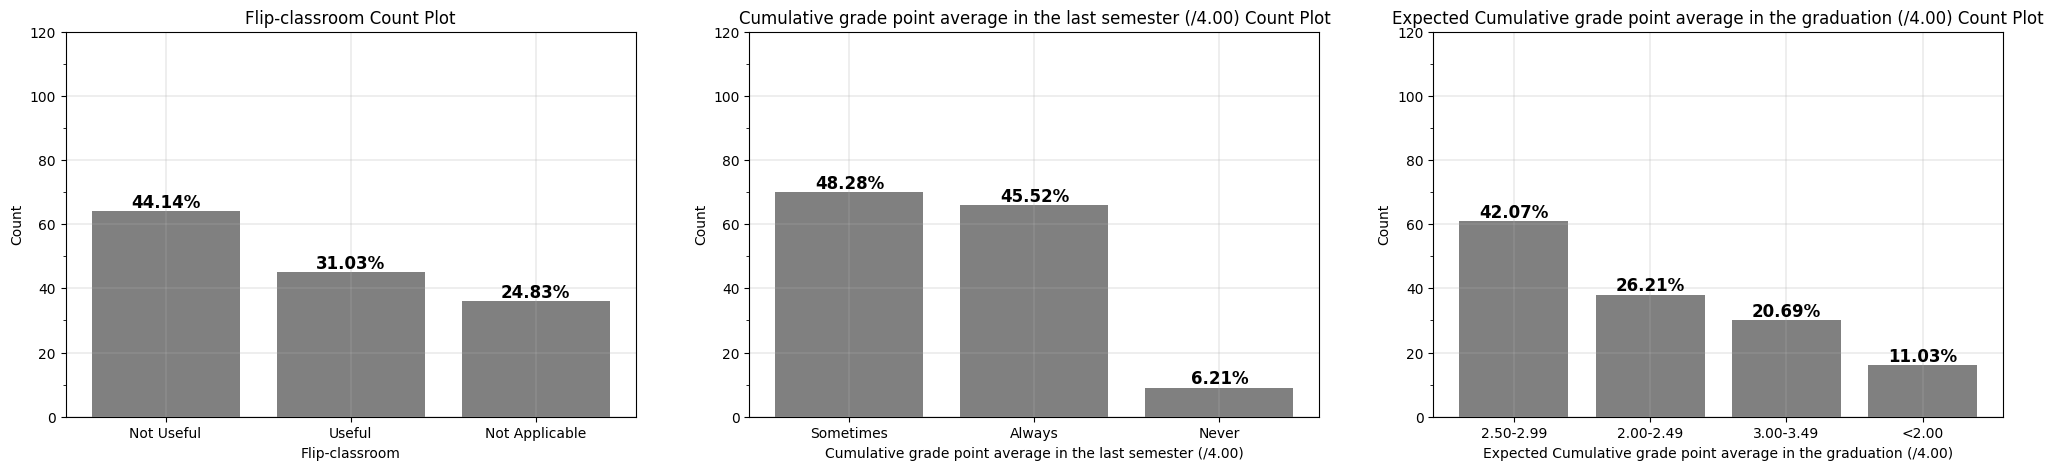

In [39]:
# Create the figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(25, 5))



# bar plot
axs[0].bar(contagem28.index, contagem28.values,color='grey')

# Add labels and title
axs[0].set_xlabel('Flip-classroom')
axs[0].set_ylabel('Count')
axs[0].set_title('Flip-classroom Count Plot')
axs[0].grid(linewidth=0.3)
axs[0].set_ylim(top=120)
axs[0].yaxis.set_minor_locator(plt.MultipleLocator(10))
for p in axs[0].patches:
    height = p.get_height()
    pct = height / total_counts1 * 100
    axs[0].annotate(f'{pct:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom',
                    fontsize=12, color='black', fontweight='bold', rotation=0)

# bar plot
axs[1].bar(contagem29.index, contagem29.values,color='grey')

# Add labels and title for gender plot
axs[1].set_xlabel('Cumulative grade point average in the last semester (/4.00)')
axs[1].set_ylabel('Count')
axs[1].set_title('Cumulative grade point average in the last semester (/4.00) Count Plot')
axs[1].grid(linewidth=0.3)
axs[1].set_ylim(top=120)
axs[1].yaxis.set_minor_locator(plt.MultipleLocator(10))
for p in axs[1].patches:
    height = p.get_height()
    pct = height / total_counts2 * 100
    axs[1].annotate(f'{pct:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom',
                    fontsize=12, color='black', fontweight='bold', rotation=0)





# bar plot
axs[2].bar(contagem30.index, contagem30.values,color='grey')

# Add labels and title
axs[2].set_xlabel('Expected Cumulative grade point average in the graduation (/4.00)')
axs[2].set_ylabel('Count')
axs[2].set_title('Expected Cumulative grade point average in the graduation (/4.00) Count Plot')
axs[2].grid(linewidth=0.3)
axs[2].set_ylim(top=120)
axs[2].yaxis.set_minor_locator(plt.MultipleLocator(10))
for p in axs[2].patches:
    height = p.get_height()
    pct = height / total_counts1 * 100
    axs[2].annotate(f'{pct:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom',
                    fontsize=12, color='black', fontweight='bold', rotation=0)

# Análise de Dimensionalidade

Foi constatado que a base apresenta um número bastante elevado de variáveis dependentes, por isso procedeu-se com a análise para possível redução de dimensionalidade, isso é, para tentar excluir da análise variáveis que possam ser consideradas sem valor para o contexto.
Para isso, foi feita uma matriz de correlação e a análise do PCA (Principal Component Analysis).

<ipython-input-40-0f9027fb106e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.drop('COURSE ID', axis=1).corr(), cmap="Greens", fmt='.2f', vmin=-1, vmax=1, annot=True)


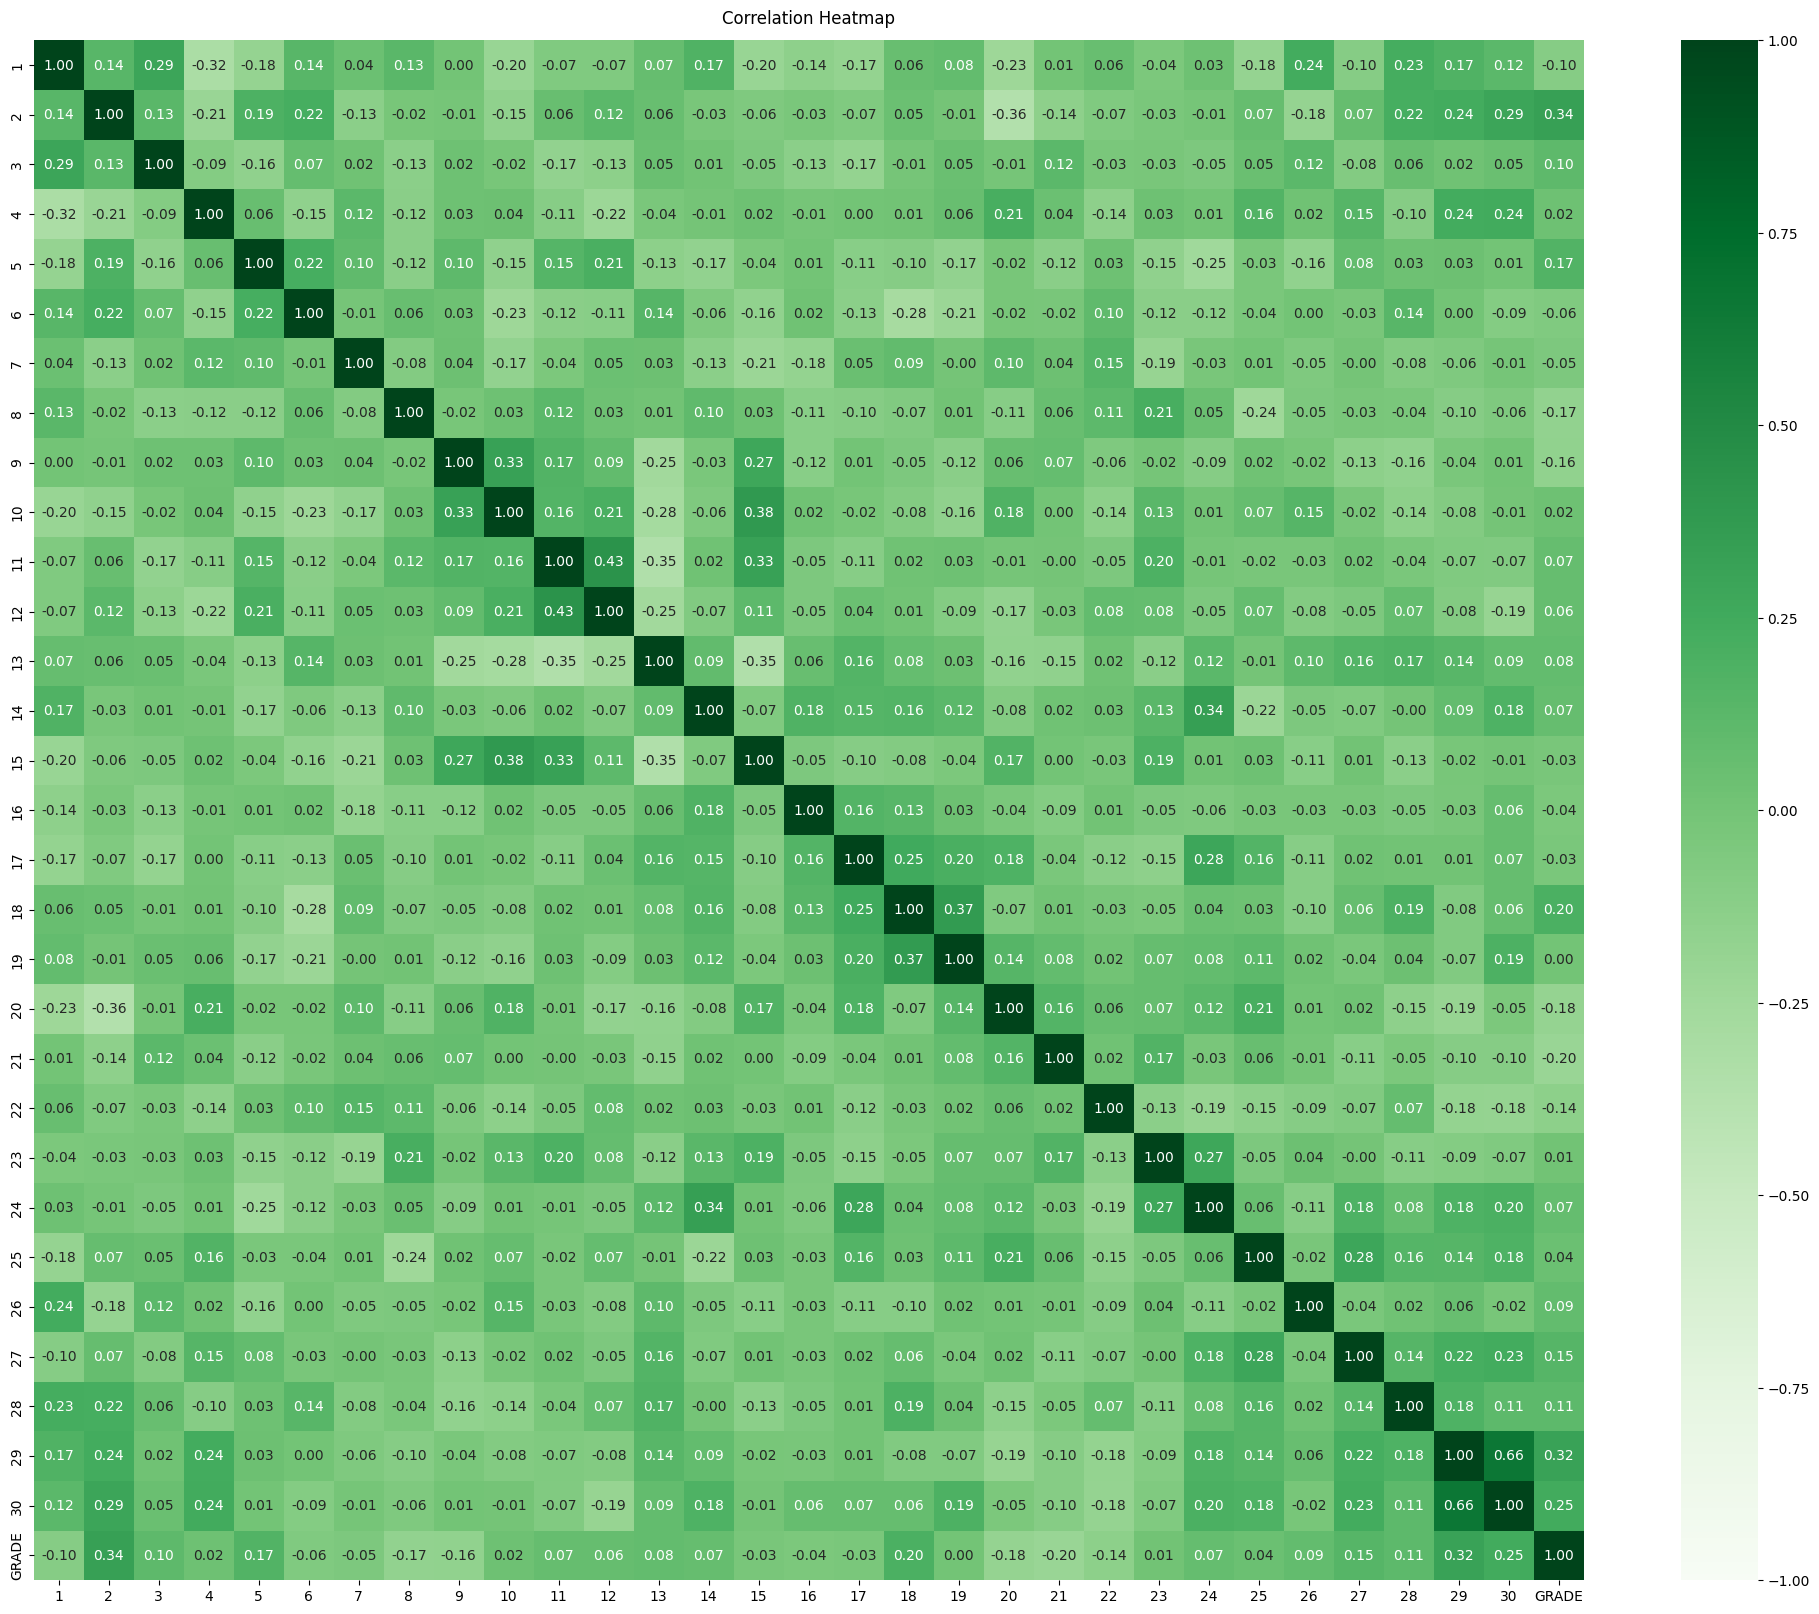

In [40]:
plt.figure(figsize=(25, 20))
heatmap = sns.heatmap(df.drop('COURSE ID', axis=1).corr(), cmap="Greens", fmt='.2f', vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

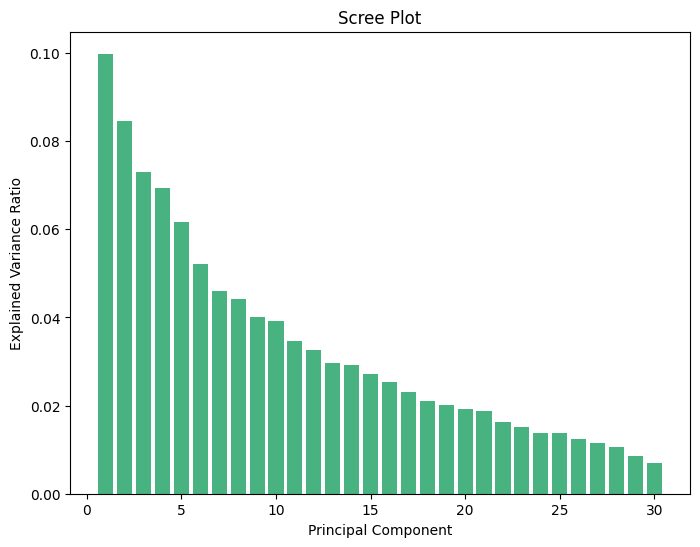

In [41]:
data = df.drop(['GRADE','COURSE ID','STUDENT ID'], axis=1)

# Standardize the data
mean = np.mean(data, axis=0)
stddev = np.std(data, axis=0)
data_standardized = (data - mean) / stddev

# PCA
pca = PCA()
pca.fit(data_standardized)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Create a scree plot
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio,color="#48B281")
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()


Por meio da análise da matriz e do gráfico das componentes principais, concluiu-se que não haveria como proceder com redução de dimensionalidade, uma vez que não foi possível identificar variáveis com correlação significativa na variação de desempenho dos estudantes.

#Encoding

O one-hot encoding é utilizado para representar dados categóricos de uma forma que os algoritmos de aprendizado de máquina possam melhor compreendê-los. Por isso, no caso dessa base esse processo também foi feito.

In [42]:
# one-hot encoding
df = pd.get_dummies(df,columns=['1','3','4','8','9','10','11','12','13','14','15','16','17','18','19','21','22','23','24','25','26','27','28','29','30'])
df['2'].replace({2:0}, inplace=True)
df['5'].replace({2:0}, inplace=True)
df['6'].replace({2:0}, inplace=True)
df['7'].replace({2:0}, inplace=True)
df['20'].replace({2:0}, inplace=True)

# Modelos

##KNN

O primeiro modelo implementado foi o K-NN, que é um algoritmo de aprendizado supervisionado que pode ser aplicado a problemas de classificação. Ele é baseado no princípio de que objetos similares tendem a estar próximos uns dos outros no espaço de características. Em outras palavras, se dois itens têm características semelhantes, é provável que pertençam à mesma categoria ou tenham valores similares para uma variável alvo.

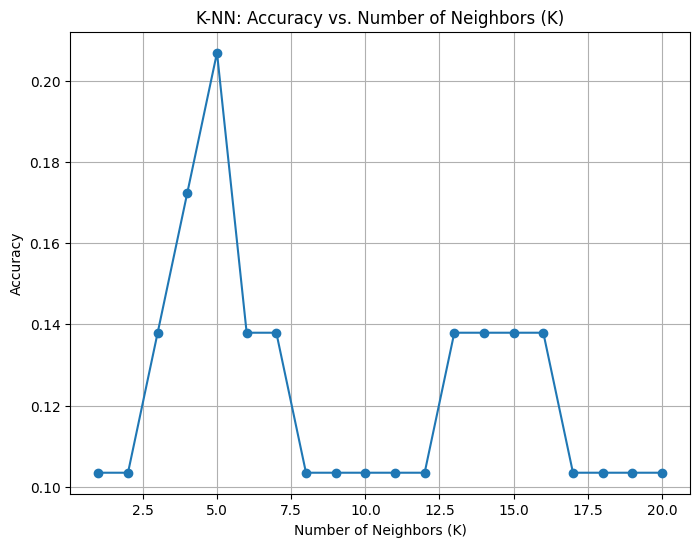

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
data = df

# Define the features (X) and the target variable (y)
X = data.drop(['STUDENT ID','GRADE','COURSE ID'], axis=1)
y = data['GRADE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of K values to test
k_values = list(range(1, 21))

# Lists to store accuracy scores for each K
accuracy_scores = []

# Test each K value
for k in k_values:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    accuracy_scores.append(accuracy)

# Plot the accuracy scores against K values
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-')
plt.title('K-NN: Accuracy vs. Number of Neighbors (K)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

O gráfico acima foi utilizado para definir o valor mais adequado para o parâmetro 'k' do modelo em questão, a fim de maximizar a acurácia. Portanto, foi definido k = 5.

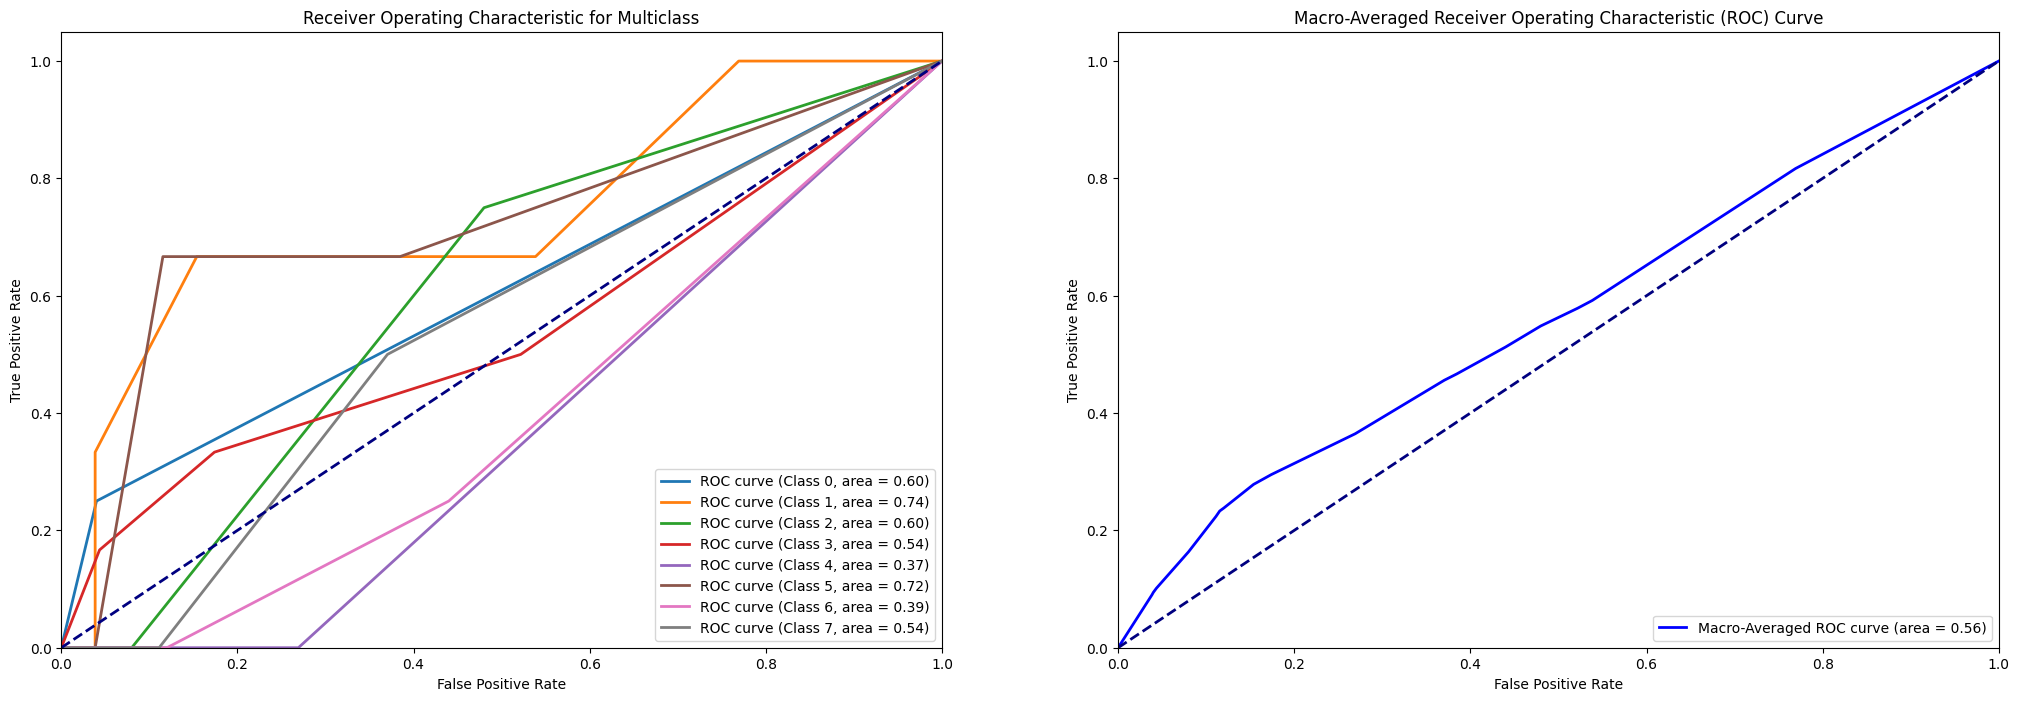

Accuracy: 0.21
Macro-Averaged ROC AUC: 0.56
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.13      0.67      0.22         3
           2       0.00      0.00      0.00         4
           3       0.33      0.33      0.33         6
           4       0.00      0.00      0.00         3
           5       0.50      0.33      0.40         3
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         2

    accuracy                           0.21        29
   macro avg       0.25      0.20      0.17        29
weighted avg       0.27      0.21      0.19        29



In [44]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, f1_score, classification_report

# Create and train a K-NN model
k = 5  # Number of neighbors to consider
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(X_train, y_train)


# Get predicted probabilities for all classes
predicted_proba = clf.predict_proba(X_test)

# Compute the ROC AUC for each class
n_classes = predicted_proba.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, predicted_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calculate the macro-averaged ROC AUC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)

for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

roc_auc_macro = auc(all_fpr, mean_tpr)

plt.figure(figsize=(25, 8))

# Calculate and plot ROC curve for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, predicted_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    plt.subplot(1, 2, 1)
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (Class {i}, area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multiclass')
plt.legend(loc="lower right")

# Plot the macro-averaged ROC curve
plt.subplot(1, 2, 2)
plt.plot(all_fpr, mean_tpr, color='b', lw=2, label=f'Macro-Averaged ROC curve (area = {roc_auc_macro:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Macro-Averaged Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

plt.show()


# Calculate other evaluation metrics
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred,zero_division=0)
print(f"Accuracy: {accuracy:.2f}")
print(f"Macro-Averaged ROC AUC: {roc_auc_macro:.2f}")
print("Classification Report:\n", classification_report_str)





- A Curva ROC (Receiver Operating Characteristic) é um gráfico que avalia a capacidade de um modelo de classificação distinguir entre as classes positiva e negativa. Quanto mais próxima a curva estiver do canto superior esquerdo, melhor o desempenho do modelo. A Área Sob a Curva ROC (AUC-ROC) resume o desempenho em um valor entre 0 e 1, sendo 1 o desempenho perfeito e 0,5 o desempenho aleatório. A ROC é uma métrica útil para comparar modelos de classificação;

- Os gráficos acima representam as curvas ROC do modelo. À direita, foi plotada a curva ROC média macro do modelo. À esquerda, foram traçadas curvas para 7 classes distintas, a fim de avaliar a performance do modelo na classificação das diferentes classes;

- Motivo pelo qual dividir em classes:
Na prática, você pode descobrir que algumas classes têm pontuações altas no ROC AUC, indicando bom desempenho do classificador, enquanto outras têm pontuações mais baixas, indicando áreas onde o modelo pode ser melhorado. Essas informações podem orientar o refinamento do modelo, a engenharia de recursos ou a coleta de dados adicionais para enfrentar desafios específicos da classe. No entanto, se estiver interessado em uma medida mais agregada do desempenho do modelo, você poderá calcular uma pontuação ROC AUC média macro ou média ponderada para avaliar o desempenho geral do modelo em todas as classes;

In [45]:
# Estimativa das features mais importantes para o K-NN
from sklearn.feature_selection import RFE

# Use RFE for feature selection
num_features_to_select = 5  # Number of features to select
rfe = RFE(estimator=clf, n_features_to_select=len(X_train.columns))
rfe.fit(X_train, y_train)

# Get the ranking of features (1 = selected, 0 = not selected)
feature_ranking = rfe.support_

# Get the names of selected features
selected_features = X.columns[feature_ranking][:5]

print("Top 5 Most Important Features (selected by RFE):")
print(selected_features)

Top 5 Most Important Features (selected by RFE):
Index(['2', '5', '6', '7', '20'], dtype='object')


## Conclusões sobre o modelo K-NN:
- Foi possível observar um comportamento mais acertivo na classificação 0,1,2,3 e 5. Apesar do modelo apresentar uma acurácia geral baixa, é importante ressaltar que para modelos puramente aleatórios seria esperado uma acurácia igual a (1/número de classes)=1/8=12,5% . Portanto, o modelo K-NN apresentou acurácia aproximadamente 1.7x superior (21%) a esses modelos.
- Conclui-se também, a partir do código acima, que as variáveis de maior importância para a determinação das classes são:
  - 2: Sexo;
  - 5: Trabalha ou não;
  - 6: Pratica esportes ou atividades artísticas;
  - 7: Tem parceiro(a) ou não;
  - 20: Participa de seminários relacionados ao curso ou não;
- Assim, percebe-se relevância quanto à dedicação exclusiva para com seu desempenho.

##Decision Tree

Árvores de decisão são comumente usadas em problemas de classificação devido à sua interpretabilidade, flexibilidade e capacidade de lidar com diversos tipos de dados. Elas automatizam a seleção de atributos, são robustas contra outliers e não fazem suposições sobre a distribuição dos dados.

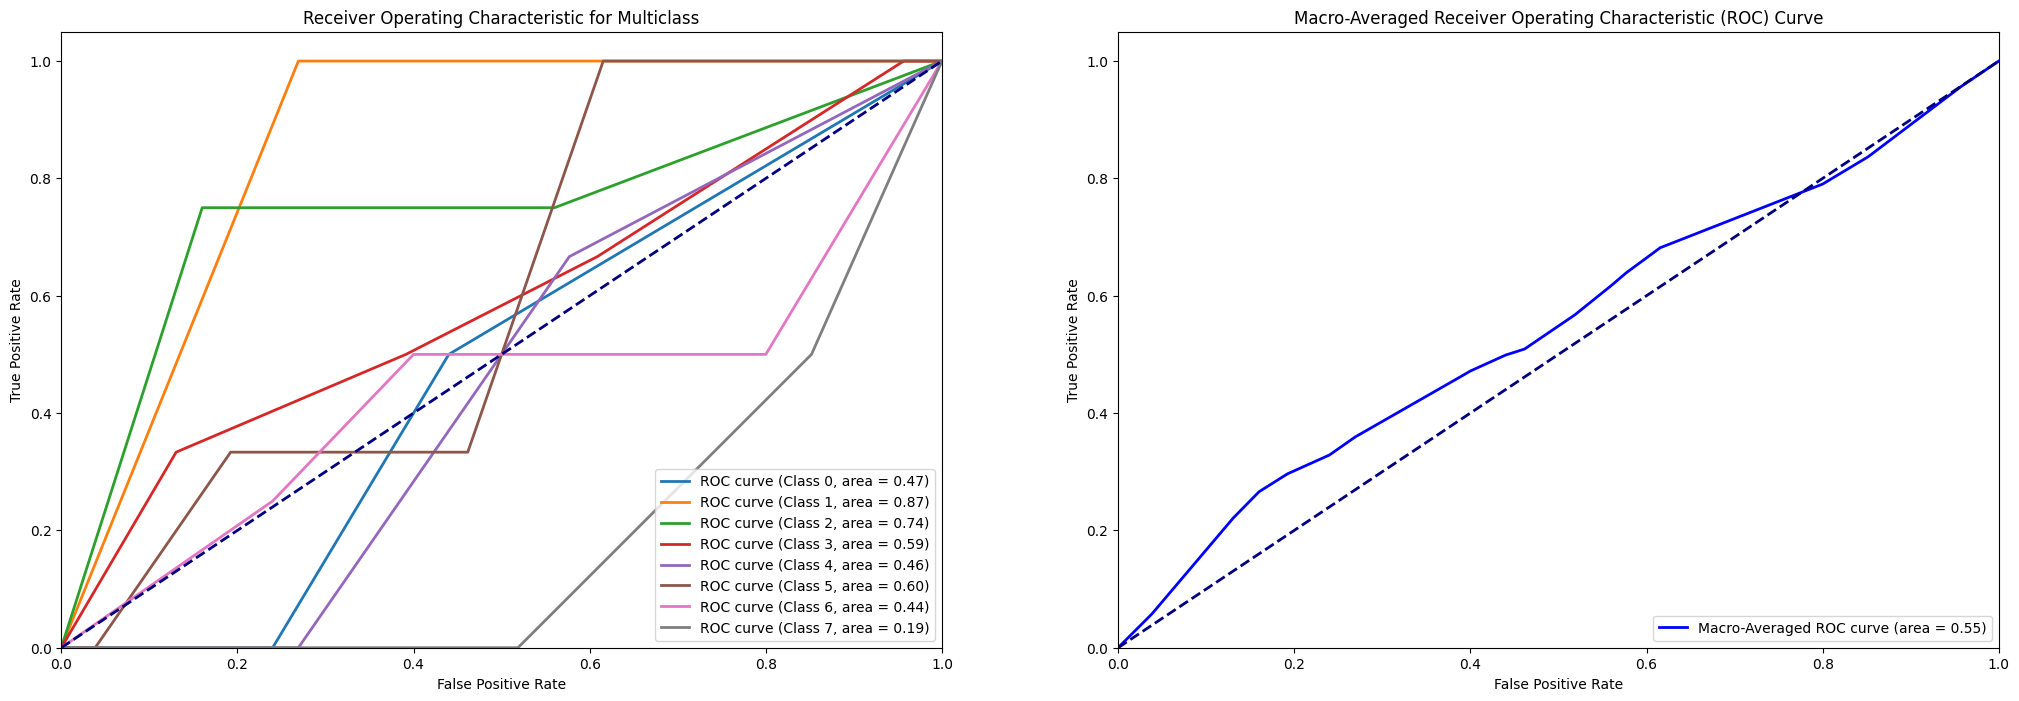

Accuracy: 0.28
Macro-Averaged ROC AUC: 0.55
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.19      1.00      0.32         3
           2       0.43      0.75      0.55         4
           3       0.40      0.33      0.36         6
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         2

    accuracy                           0.28        29
   macro avg       0.13      0.26      0.15        29
weighted avg       0.16      0.28      0.18        29



In [46]:
from sklearn.tree import DecisionTreeClassifier

# Create and train a Decision Tree model
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

# Get predicted probabilities for all classes
predicted_proba = clf.predict_proba(X_test)

# Calculate the macro-averaged ROC AUC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)

for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

roc_auc_macro = auc(all_fpr, mean_tpr)

plt.figure(figsize=(25, 8))

# Compute the ROC AUC for each class
n_classes = predicted_proba.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, predicted_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    plt.subplot(1, 2, 1)
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (Class {i}, area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multiclass')
plt.legend(loc="lower right")

# Calculate the macro-averaged ROC AUC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)

for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

roc_auc_macro = auc(all_fpr, mean_tpr)

# Plot the macro-averaged ROC curve
plt.subplot(1, 2, 2)
plt.plot(all_fpr, mean_tpr, color='b', lw=2, label=f'Macro-Averaged ROC curve (area = {roc_auc_macro:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Macro-Averaged Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

plt.show()

# Calculate other evaluation metrics
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred,zero_division=0)
print(f"Accuracy: {accuracy:.2f}")
print(f"Macro-Averaged ROC AUC: {roc_auc_macro:.2f}")
print("Classification Report:\n", classification_report_str)

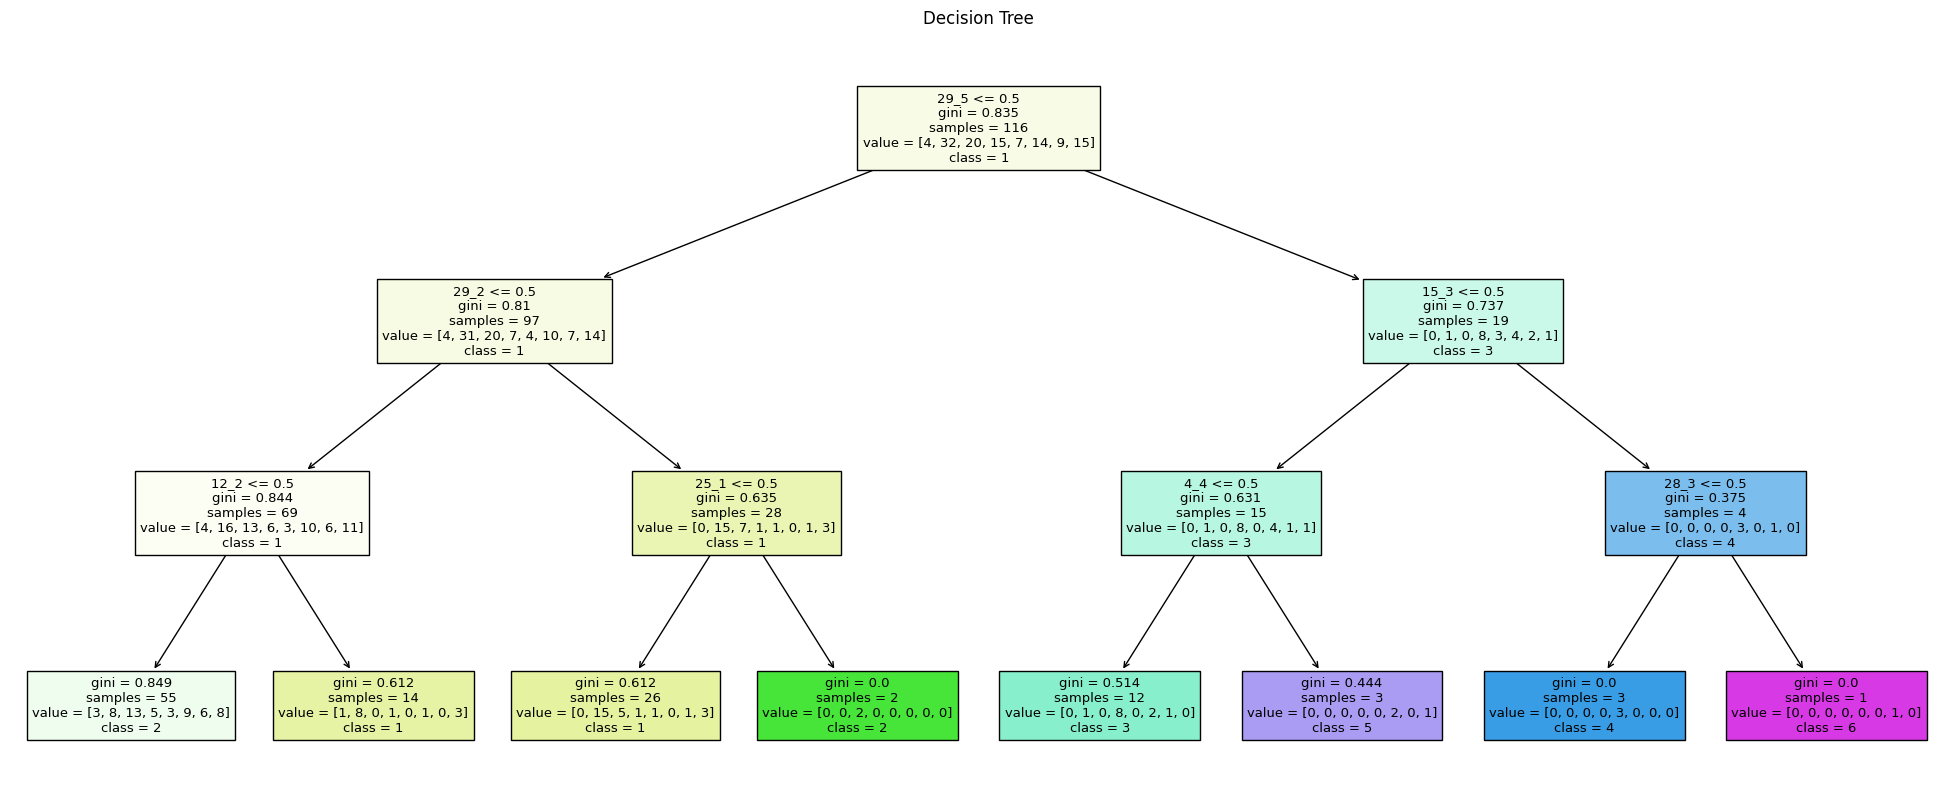

In [47]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
plt.figure(figsize=(25, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=[str(i) for i in clf.classes_])
plt.title("Decision Tree")
plt.show()

## Conclusões sobre o modelo Árvore de Decisão:
- Foi possível observar um comportamento mais acertivo na classificação 1,2,3 e 5. Apesar do modelo apresentar uma acurácia geral baixa, é importante ressaltar que para modelos puramente aleatórios seria esperado uma acurácia igual a (1/número de classes)=1/8=12,5% . Portanto, o modelo de árvore apresentou acurácia aproximadamente 2.25x superior (28%) a esses modelos.
- Conclui-se também, a partir do código acima, que as variáveis de maior importância para a determinação das classes são:
  - 29_5: Nota > 3,49;
  - 29_2: 2 < Nota < 2,49;
  - 12_2: Educação Pai = Fundamental;
  - 25_1: Não faz anotações em aula?
  - 15_3: Mãe concursada?
  - 4_4: Tipo escolaridade 75%?
  - 28_3: Não tem aula invertida?
- Assim, percebe-se relevância quanto à relações familiares, hábitos escolares e desempenhos passados no bom desempenho dos estudantes.

## Regressão Logística

A regressão logística é amplamente utilizada em problemas de classificação devido à sua capacidade de modelar probabilidades de pertencer a classes, tornando-a ideal para entender a incerteza associada à classificação. Sua interpretabilidade e aplicabilidade a problemas binários e multiclasse são vantagens significativas.

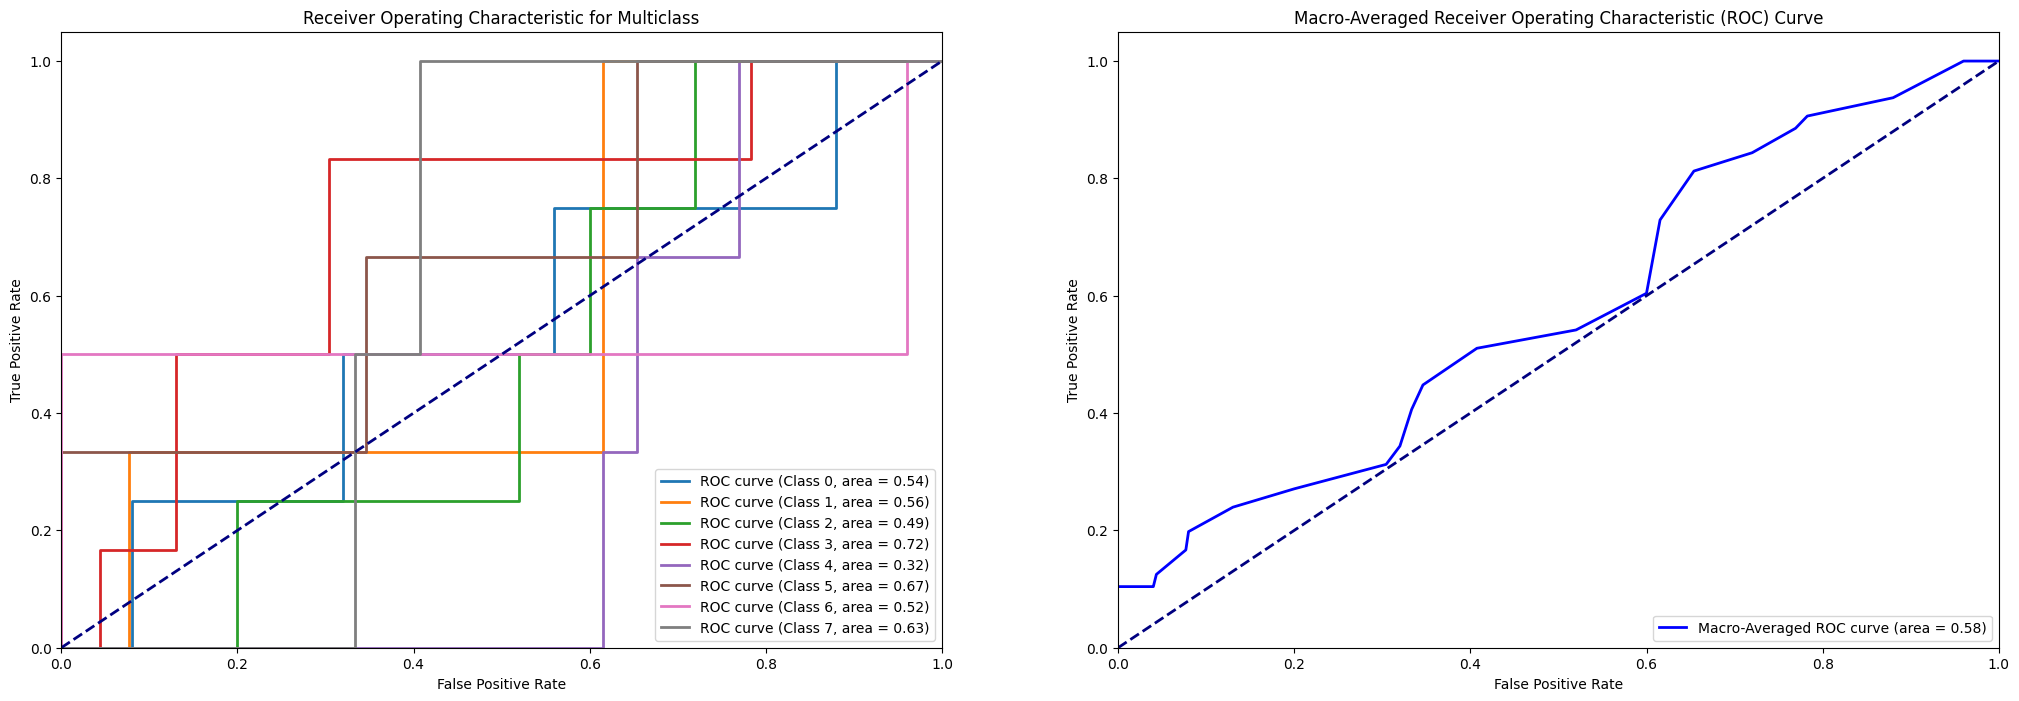

Accuracy: 0.21
Macro-Averaged ROC AUC: 0.58
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.08      0.33      0.12         3
           2       0.00      0.00      0.00         4
           3       0.50      0.50      0.50         6
           4       0.00      0.00      0.00         3
           5       0.33      0.33      0.33         3
           6       1.00      0.25      0.40         4
           7       0.00      0.00      0.00         2

    accuracy                           0.21        29
   macro avg       0.24      0.18      0.17        29
weighted avg       0.28      0.21      0.21        29



In [48]:
from sklearn.linear_model import LogisticRegression

# Create and train a Decision Tree model
clf = LogisticRegression(solver='lbfgs', max_iter=1000)
clf.fit(X_train, y_train)

# Get predicted probabilities for all classes
predicted_proba = clf.predict_proba(X_test)

# Calculate the macro-averaged ROC AUC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)

for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

roc_auc_macro = auc(all_fpr, mean_tpr)

plt.figure(figsize=(25, 8))

# Compute the ROC AUC for each class
n_classes = predicted_proba.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, predicted_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    plt.subplot(1, 2, 1)
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (Class {i}, area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multiclass')
plt.legend(loc="lower right")

# Calculate the macro-averaged ROC AUC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)

for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

roc_auc_macro = auc(all_fpr, mean_tpr)

# Plot the macro-averaged ROC curve
plt.subplot(1, 2, 2)
plt.plot(all_fpr, mean_tpr, color='b', lw=2, label=f'Macro-Averaged ROC curve (area = {roc_auc_macro:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Macro-Averaged Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

plt.show()

# Calculate other evaluation metrics
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred,zero_division=0)
print(f"Accuracy: {accuracy:.2f}")
print(f"Macro-Averaged ROC AUC: {roc_auc_macro:.2f}")
print("Classification Report:\n", classification_report_str)

In [49]:
coefficients = clf.coef_[0]

coef_abs = abs(coefficients)
feature_names = X.columns

feature_coef_dict = dict(zip(feature_names, coef_abs))

sorted_feature_coef = sorted(feature_coef_dict.items(), key=lambda x: x[1], reverse=True)

print("Top 5 Most Important Features:")
for feature, coef in sorted_feature_coef[:5]:
    print(f"{feature}: {coef:.2f}")

Top 5 Most Important Features:
29_1: 0.79
9_1: 0.58
7: 0.56
2: 0.53
8_1: 0.44


## Conclusões sobre o modelo Regressão Logística:
- Foi possível observar um comportamento mais acertivo na classificação 3,5,6 e 7. Apesar do modelo apresentar uma acurácia geral baixa, é importante ressaltar que para modelos puramente aleatórios seria esperado uma acurácia igual a (1/número de classes)=1/8=12,5% . Portanto, o modelo de árvore apresentou acurácia aproximadamente 1.7x superior (21%) a esses modelos.
- Conclui-se também, a partir do código acima, que as variáveis de maior importância para a determinação das classes são:
  - 29_1: Nota < 2;
  - 9_1: Ônibus como meio de transporte;
  - 7: Tem parceiro(a) ou não;
  - 2: Sexo;
  - 8_1: Ganha salário entre 135 e 200 dólares.
- Assim, percebe-se relevância quanto a desempenhos passados, situação econômica e dedicação exclusiva no bom desempenho dos estudantes.

# Conclusão
Avaliando conjuntamente os modelos, foi notada maior recorrência dos aspectos na determinação do desempenho dos estudantes:
 - Desempenho passado;
 - Dedicação exclusiva;
 - Hábitos escolares.